# Bar plot: Query (DroughtDB) vs. Number of hits

__Aim:__ Know the distribution of hits across the DroughtDB (194 seqs) dataset.

__Steps to do this:__
1. Export all CSV (comma) from BlastGrabber of the Blast results for Query seqs/hits
2. Create matrix with an extra columm to account for dataset in excel (18 different datasets)
3. Generate different bar plots in R
## A. EST (leaves and shoots) and CDS (criollo vers 2)¶
<br>Datasets (from test 1.2 from Blast T. cacao):
- EST 17 libraries from shoots, leaves and roots
- CDS Criollo Genome V2
- 194 Drought DB sequences   

### __1. Required libraries__


In [2]:
library("dplyr")
library("RColorBrewer")
library("ggplot2")
library("repr")

### __2. Upload data to R__

In [8]:
KZ0ACR<-read.csv("results_Blast_RPPSSHPNGb_KZ0ACR.csv")
KZ0ACAL<-read.csv("results_Blast_RPPSSHPNGa_KZ0ACAL.csv")
KZ0ACAD<-read.csv("results_Blast_MIRIDUFS_KZ0ACAD.csv")
KZ0ACV<- read.csv("results_Blast_LESSHMEPNGb_KZ0ACV.csv")
KZ0ACAP<-read.csv("results_Blast_LESSHMEPNGa_KZ0ACAP.csv")
KZ0ACAN<-read.csv("results_Blast_SSHMIRUFa_KZ0ACAN.csv")
KZ0ACB<-read.csv("results_Blast_STSSHWB2Sb_KZ0ACB.csv")
KZ0ACQ<-read.csv("results_Blast_LEAVPAGU_KZ0ACQ.csv")
KZ0ACT<-read.csv("results_Blast_SSHMIRUFb_KZ0ACT.csv")
KZ0ABI_K<-read.csv("results_Blast_STSSHWB1S_KZ0ABI_K.csv")
KZ0ACAF<-read.csv("results_Blast_DROUGHTLS_KZ0ACAF.csv")

CDS_CriolloV2<-read.csv("results_Blast_test2_1_CDS_CriolloV2.csv")
KZ0ABP<-read.csv("results_Blast_LESSHPNGRSb_KZ0ABP.csv")
KZ0ACP<-read.csv("results_Blast_LEPAPNGR_KZ0ACP.csv")
KZ0ABE<-read.csv("results_Blast_LEAVES_KZ0ABE.csv")
KZ0ACAE<-read.csv("results_Blast_DROUGHTRS_KZ0ACAE.csv")#Roots under drought stress
KZ0AA<-read.csv("results_Blast_COSSHPPI_IS_KZ0AA_fixed.csv")
KZ0AC_fixed<-read.csv("results_Blast_RESSHMEPNGb_KZ0AC_fixed.csv")

### __3. Merging the dataframes:__ uses "dplyr"

   __A.__ EST 17 libraries + CDS Criollo genome V2: "results_blast18"

In [10]:
results_blast18<-bind_rows(KZ0ACR,
                           KZ0ACAL,
                           KZ0ACAD,
                           KZ0ACV,
                           KZ0ACAP,
                           KZ0ACAN,
                           KZ0ACB,
                           KZ0ACQ,
                           KZ0ACT,
                           KZ0ABI_K,
                           KZ0ACAF,
                           CDS_CriolloV2,
                           KZ0ABP,
                           KZ0ACP,
                           KZ0ABE,
                           KZ0ACAE,
                           KZ0AA,
                           KZ0AC_fixed)

Count observations by group: should be 194 sequences per dataset, 18 datasets

In [13]:
summary(results_blast18)
results_blast18 %>% count(Dataset) 

                         Query      Number.of.sequences Number.of.hits    
 AF077629.1_cds_AAF15307.1_1:  18   Min.   : 0.00000    Min.   : 0.00000  
 AF370358.1_cds_AAK53432.1_1:  18   1st Qu.: 0.00000    1st Qu.: 0.00000  
 AM493723.1_cds_CAM35490.1_1:  18   Median : 0.00000    Median : 0.00000  
 AT1G01360.1                :  18   Mean   : 0.06357    Mean   : 0.06386  
 AT1G07890.3                :  18   3rd Qu.: 0.00000    3rd Qu.: 0.00000  
 AT1G08810.1                :  18   Max.   :78.00000    Max.   :78.00000  
 (Other)                    :3384                                         
        Dataset    
 EST_KZ0ACR : 194  
 EST_KZ0ACAL: 194  
 EST_KZ0ACAD: 194  
 EST_KZ0ACV : 194  
 EST_KZ0ACAP: 194  
 EST_KZ0ACAN: 194  
 (Other)    :2328  

   __B.__ 17 EST libraries: "results_blast17"

In [14]:
results_blast17<-bind_rows(KZ0ACR,
                           KZ0ACAL,
                           KZ0ACAD,
                           KZ0ACV,
                           KZ0ACAP,
                           KZ0ACAN,
                           KZ0ACB,
                           KZ0ACQ,
                           KZ0ACT,
                           KZ0ABI_K,
                           KZ0ACAF,
                           KZ0ABP,
                           KZ0ACP,
                           KZ0ABE,
                           KZ0ACAE,
                           KZ0AA,
                           KZ0AC_fixed)
summary(results_blast17)
results_blast17 %>% count(Dataset)

                         Query      Number.of.sequences Number.of.hits    
 AF077629.1_cds_AAF15307.1_1:  17   Min.   : 0.00000    Min.   : 0.00000  
 AF370358.1_cds_AAK53432.1_1:  17   1st Qu.: 0.00000    1st Qu.: 0.00000  
 AM493723.1_cds_CAM35490.1_1:  17   Median : 0.00000    Median : 0.00000  
 AT1G01360.1                :  17   Mean   : 0.04973    Mean   : 0.04973  
 AT1G07890.3                :  17   3rd Qu.: 0.00000    3rd Qu.: 0.00000  
 AT1G08810.1                :  17   Max.   :78.00000    Max.   :78.00000  
 (Other)                    :3196                                         
        Dataset    
 EST_KZ0ACR : 194  
 EST_KZ0ACAL: 194  
 EST_KZ0ACAD: 194  
 EST_KZ0ACV : 194  
 EST_KZ0ACAP: 194  
 EST_KZ0ACAN: 194  
 (Other)    :2134  

Dataset,n
<fct>,<int>
EST_KZ0ACR,194
EST_KZ0ACAL,194
EST_KZ0ACAD,194
EST_KZ0ACV,194
EST_KZ0ACAP,194
EST_KZ0ACAN,194
EST_KZ0ACB,194
EST_KZ0ACQ,194
EST_KZ0ACT,194


__C.__ Subset dataframe __EST only__ with sequences containing bigger than zero (0) hits: "results_blastEST_hits"

In [16]:
results_blastEST_hits<-subset(results_blast17, Number.of.hits > 0)
summary(results_blastEST_hits)

                                 Query    Number.of.sequences Number.of.hits  
 AY857933.1_cds_AAW47577.1_1        :12   Min.   : 1.000      Min.   : 1.000  
 AT4G00430.1                        : 3   1st Qu.: 1.000      1st Qu.: 1.000  
 MLOC_13871.1                       : 3   Median : 1.000      Median : 1.000  
 XM_015770913.1_cds_XP_015626399.1_1: 3   Mean   : 4.432      Mean   : 4.432  
 AT1G01360.1                        : 2   3rd Qu.: 3.000      3rd Qu.: 3.000  
 AT3G54820.1                        : 2   Max.   :78.000      Max.   :78.000  
 (Other)                            :12                                       
            Dataset  
 EST_KZ0AA_fixed:13  
 EST_KZ0ACAD    : 4  
 EST_KZ0ABE     : 4  
 EST_KZ0ACAN    : 3  
 EST_KZ0ACAE    : 3  
 EST_KZ0ACB     : 2  
 (Other)        : 8  

__D.__ Subset of __EST libraries + CDS Genome criollo V2__ with number of hits bigger than 0:"results_blast18_hits"

In [17]:
results_blast18_hits<-subset(results_blast18, Number.of.hits > 0)
summary(results_blast18_hits)

                                 Query    Number.of.sequences Number.of.hits  
 AY857933.1_cds_AAW47577.1_1        :12   Min.   : 1.000      Min.   : 1.000  
 AT4G00430.1                        : 4   1st Qu.: 1.000      1st Qu.: 1.000  
 MLOC_13871.1                       : 4   Median : 1.000      Median : 1.000  
 XM_015770913.1_cds_XP_015626399.1_1: 4   Mean   : 3.127      Mean   : 3.141  
 AT1G01360.1                        : 3   3rd Qu.: 2.500      3rd Qu.: 2.500  
 AT3G54820.1                        : 3   Max.   :78.000      Max.   :78.000  
 (Other)                            :41                                       
            Dataset  
 CriolloV2_CDS  :34  
 EST_KZ0AA_fixed:13  
 EST_KZ0ACAD    : 4  
 EST_KZ0ABE     : 4  
 EST_KZ0ACAN    : 3  
 EST_KZ0ACAE    : 3  
 (Other)        :10  

__C.__ Subset of __CDS_CriolloV2 with hits only__: "results_blastCriolloV2_hits"

In [1]:
results_blastCriolloV2_hits<-subset(CDS_CriolloV2, Number.of.hits > 0)

**D.** All __EST libraries, 163,304__ sequences: "results_ESTall"

In [15]:
results_ESTall<-read.csv("results_Blast_test1_1_ESTall.csv")
results_ESTall$Dataset<-"ESTall"
summary(results_ESTall)

                         Query     Number.of.sequences Number.of.hits   
 AF077629.1_cds_AAF15307.1_1:  1   Min.   :  0.000     Min.   :  0.000  
 AF370358.1_cds_AAK53432.1_1:  1   1st Qu.:  0.000     1st Qu.:  0.000  
 AM493723.1_cds_CAM35490.1_1:  1   Median :  0.000     Median :  0.000  
 AT1G01360.1                :  1   Mean   :  3.521     Mean   :  3.521  
 AT1G07890.3                :  1   3rd Qu.:  0.000     3rd Qu.:  0.000  
 AT1G08810.1                :  1   Max.   :250.000     Max.   :250.000  
 (Other)                    :188                                        
   Dataset         
 Length:194        
 Class :character  
 Mode  :character  
                   
                   
                   
                   

__E.__ Subset of __results_ESTall:__  "results_ESTall_hits"

In [16]:
results_ESTall_hits<-subset(results_ESTall, Number.of.hits > 0)
summary(results_ESTall_hits)

         Query    Number.of.sequences Number.of.hits     Dataset         
 AT1G01360.1: 1   Min.   :  1.00      Min.   :  1.00   Length:25         
 AT1G15690.1: 1   1st Qu.:  1.00      1st Qu.:  1.00   Class :character  
 AT1G48410.2: 1   Median :  4.00      Median :  4.00   Mode  :character  
 AT1G58440.1: 1   Mean   : 27.32      Mean   : 27.32                     
 AT1G78290.2: 1   3rd Qu.: 29.00      3rd Qu.: 29.00                     
 AT1G78580.1: 1   Max.   :250.00      Max.   :250.00                     
 (Other)    :19                                                          

#### Summary of datasets generated:
- __results_blast18_hits__: EST libraries + genome with at least 1 hit
- __results_blastEST_hits__: EST libraries with at least 1 hit
- __results_blast17__: EST libraries
- __results_blast18__: EST libraries + genome 
- __CDS_CriolloV2__: genome
- __results_blastCriolloV2_hits__: genome only at least 1 hit
- __results_ESTall:__ Complete EST libraries (163,304 sequences)
- __results_ESTall_hits:__ Complete EST libraries, only at least 1 hit

### 4. Generating the graph:

Uses "ggplot2" for a grouped barplot, "RColorBrewer" for palette, "repr" for rezising the plot


__A.__ 17 EST libraries + CDS Criollo genome V2: __results_blast18__
- __aim:__ Distribution of hits across the whole 194 DroughtDB dataset
- __results:__  see next

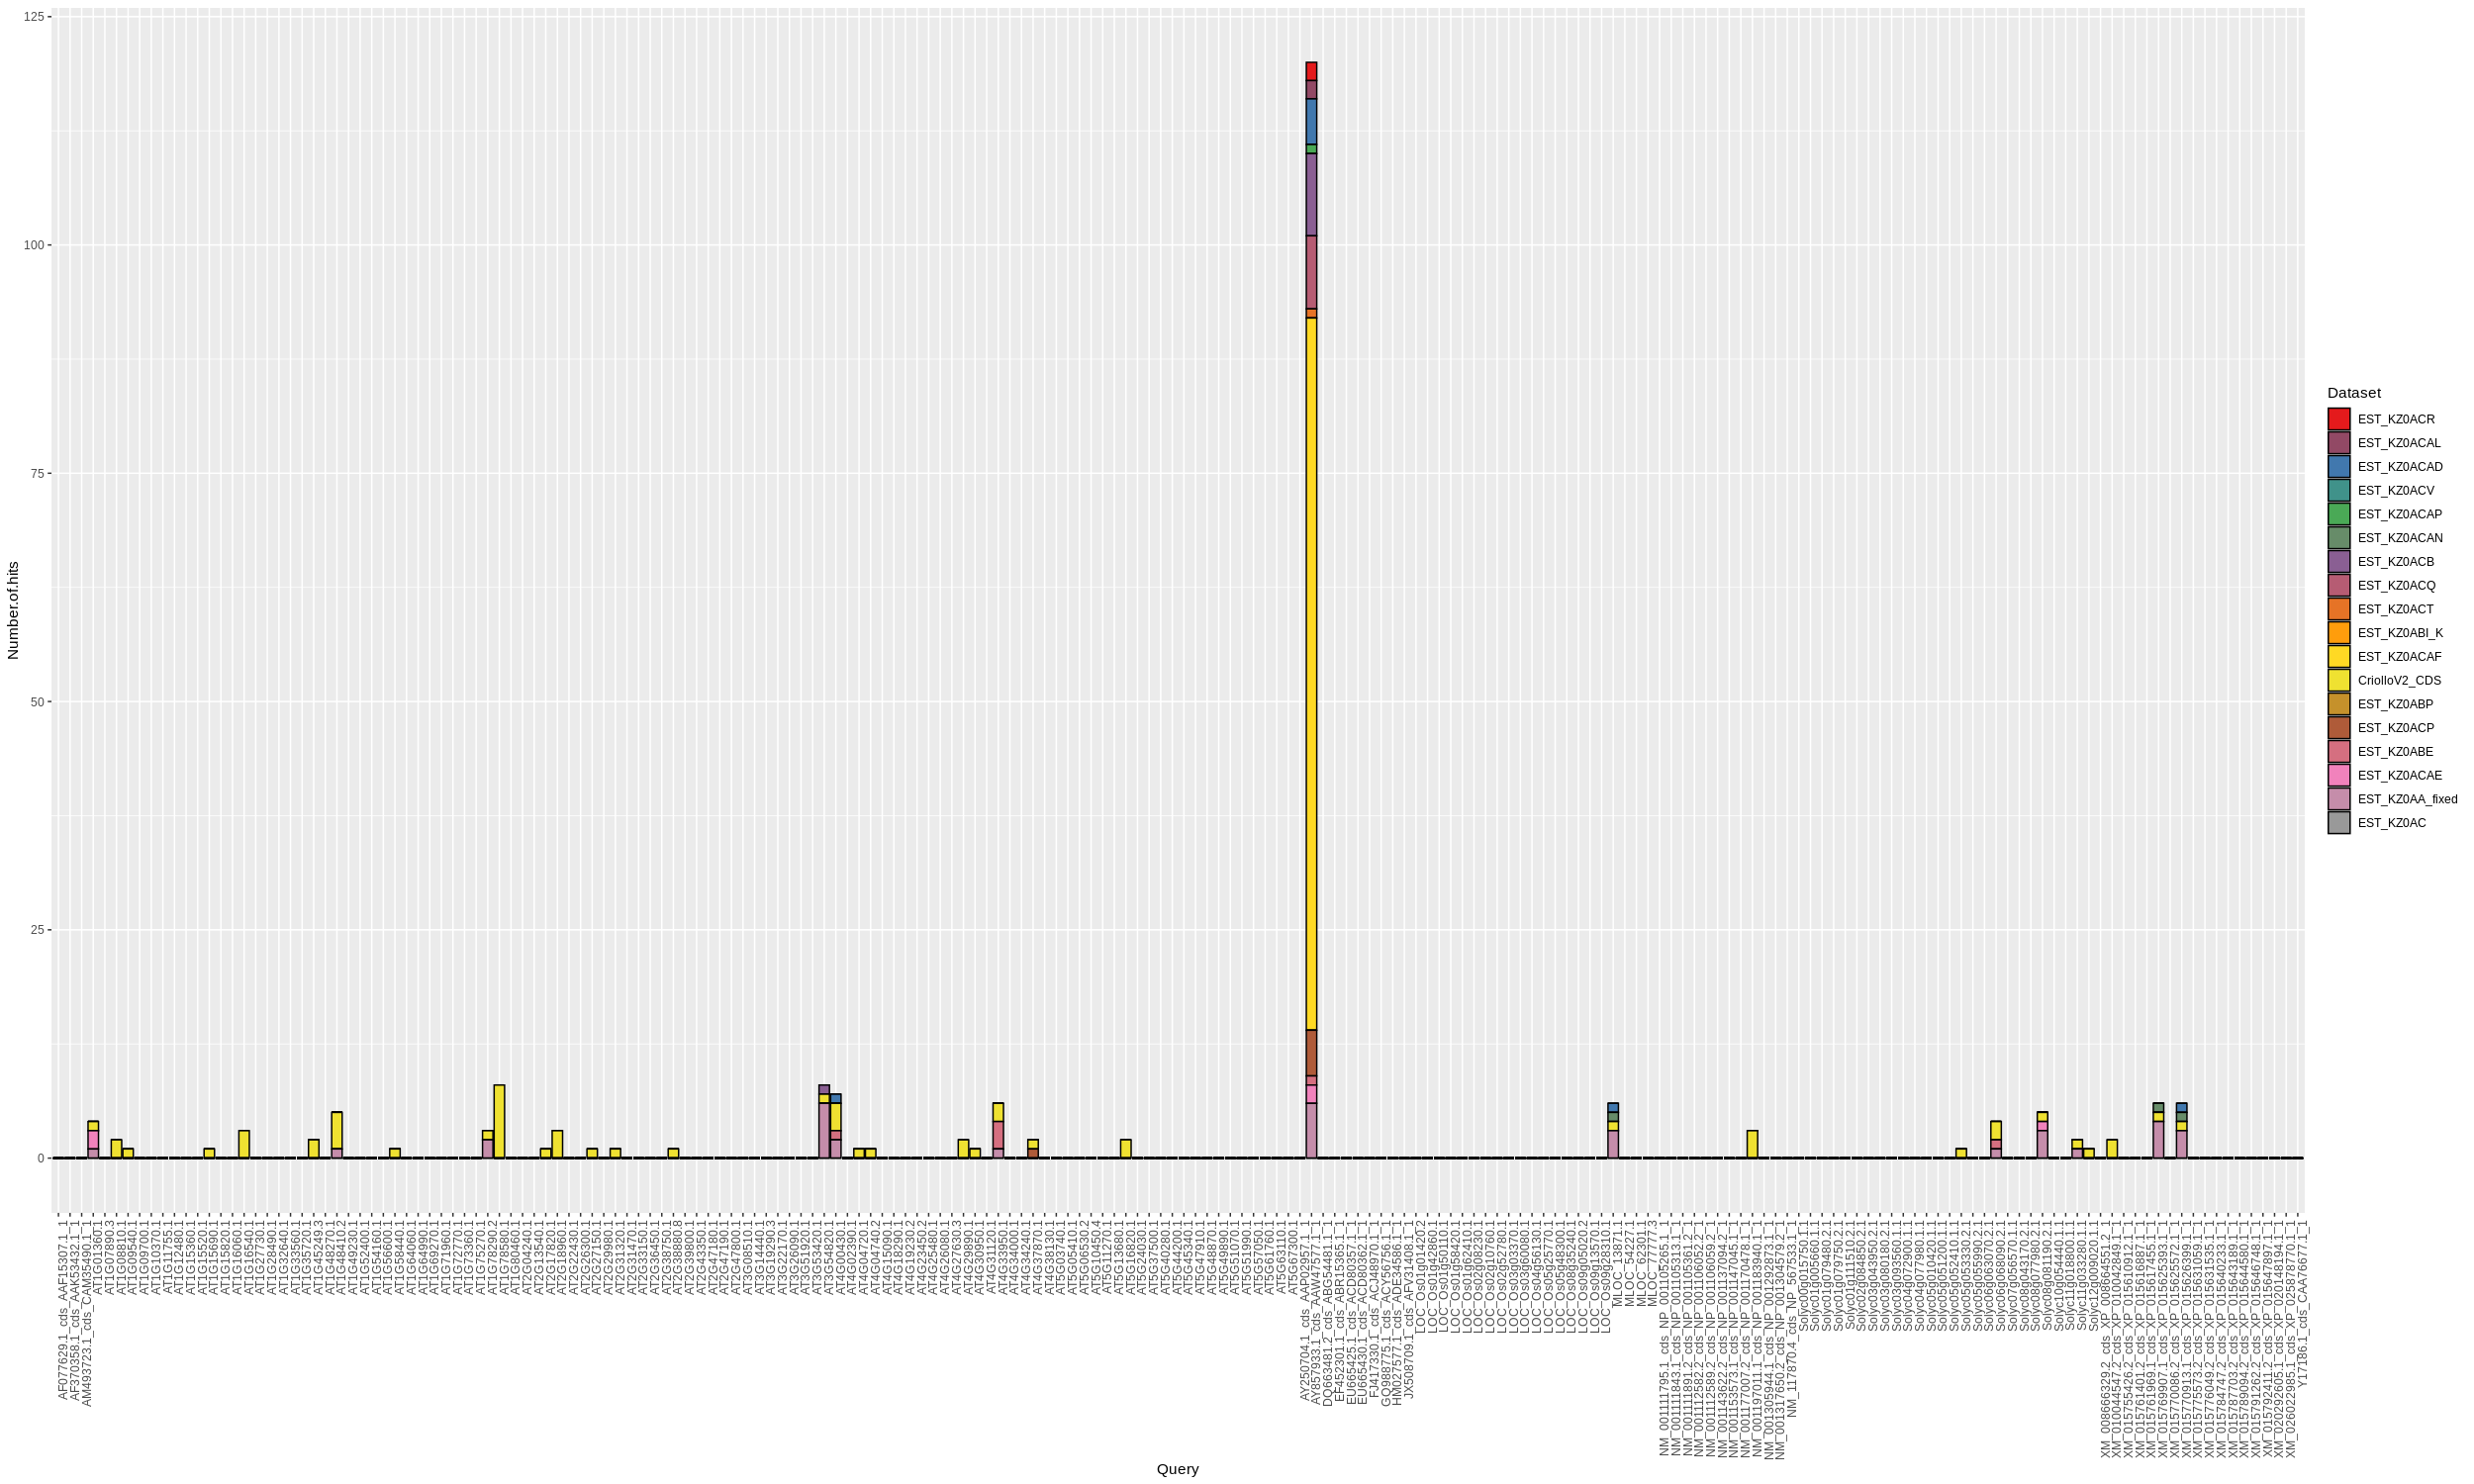

In [30]:
options(repr.plot.width=25, repr.plot.height=10) #from "repr" to resize plot

#CReate color palette to get as many as 18 colors
colorCount= length(unique(results_blast18$Dataset))
getPalette= colorRampPalette(brewer.pal(9,"Set1"))
p1<-ggplot(results_blast18, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p1 + scale_fill_manual(values = getPalette(colorCount)) + theme(axis.text.x = element_text(angle = 90, hjust = 1) ) #rotate and adjust x axis text

__B.__ 17 EST libraries + CDS Criollo Genome V2, only the sequences that got hits: __results_blast18_hits__
- __aim:__ Check distribution of sequences that got hits only
- __results:__ 35 DroughtDB sequences had at least one hit in the EST libraries + Genome

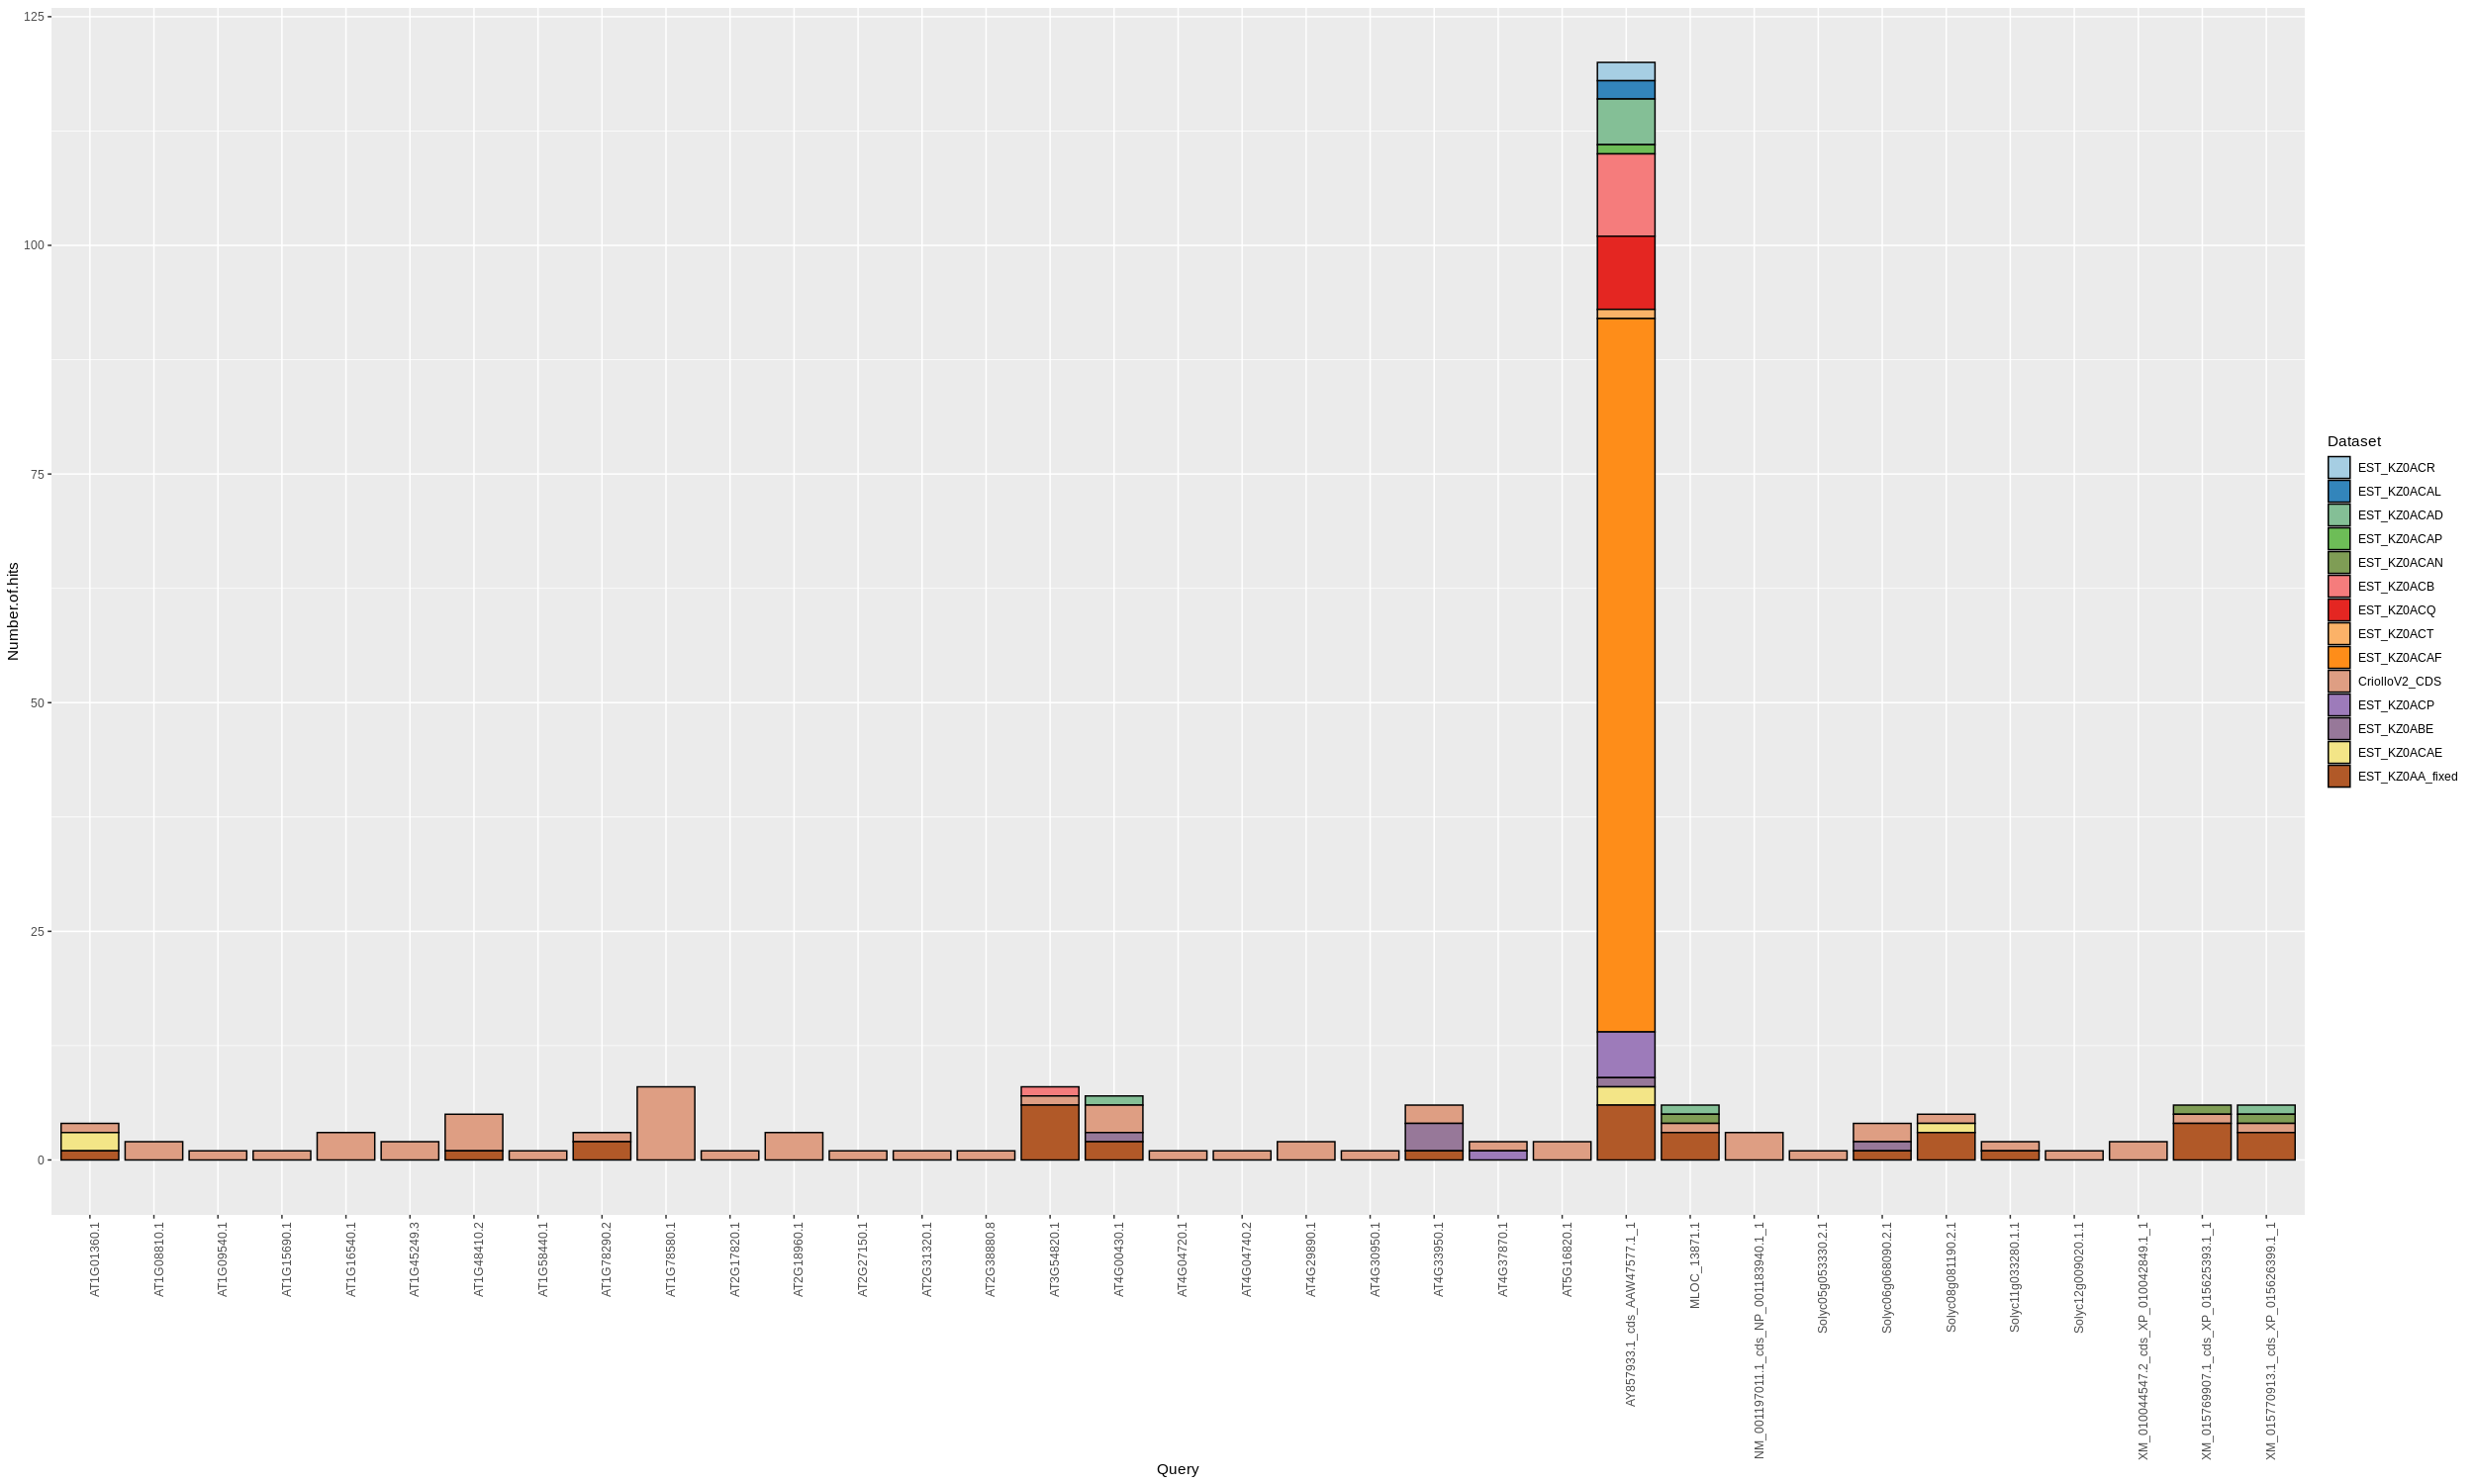

In [38]:
colorCount4= length(unique(results_blast18_hits$Dataset)) #extend color palette
getPalette4= colorRampPalette(brewer.pal(12,"Paired"))
p8<-ggplot(results_blast18_hits, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p8 + scale_fill_manual(values = getPalette4(colorCount4)) + theme(axis.text.x = element_text(angle = 90, hjust = 1) ) #rotate and adjust x axis text


__C.__ Hits for EST libraries and for genome respectively:__results_blastEST_hits__ and __results_blastCriolloV2_hits__


__aim:__ Distribution of sequences with hits compared


__results:__
- 14/194 sequences in EST
- 33/194 sequences in CDS Genome Criollo V2
- total 35/194 sequences have hits in both Genome and 17 EST 

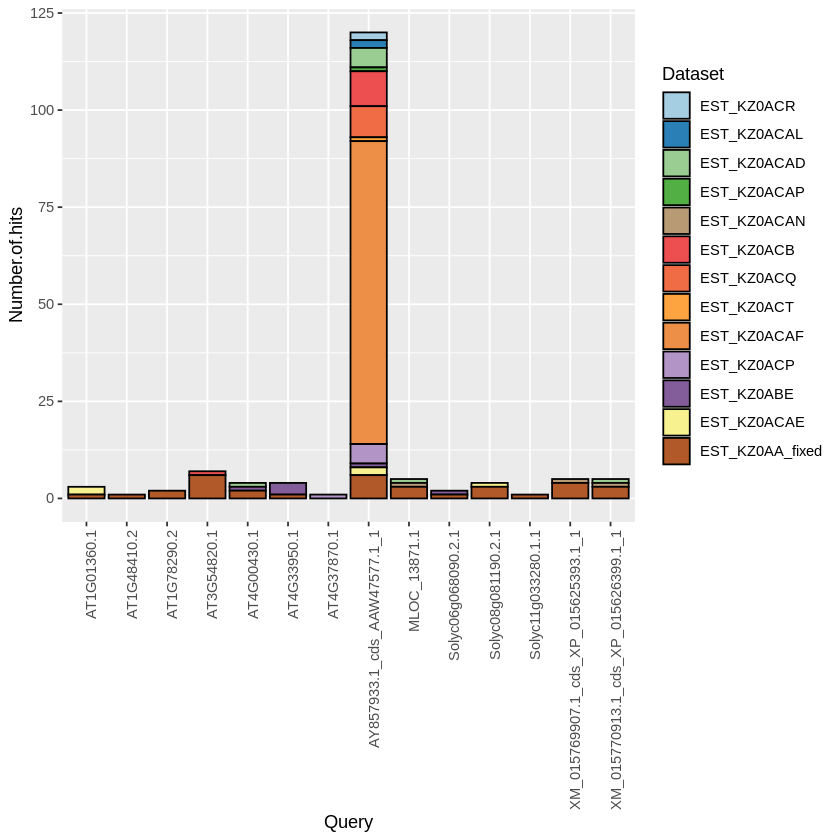

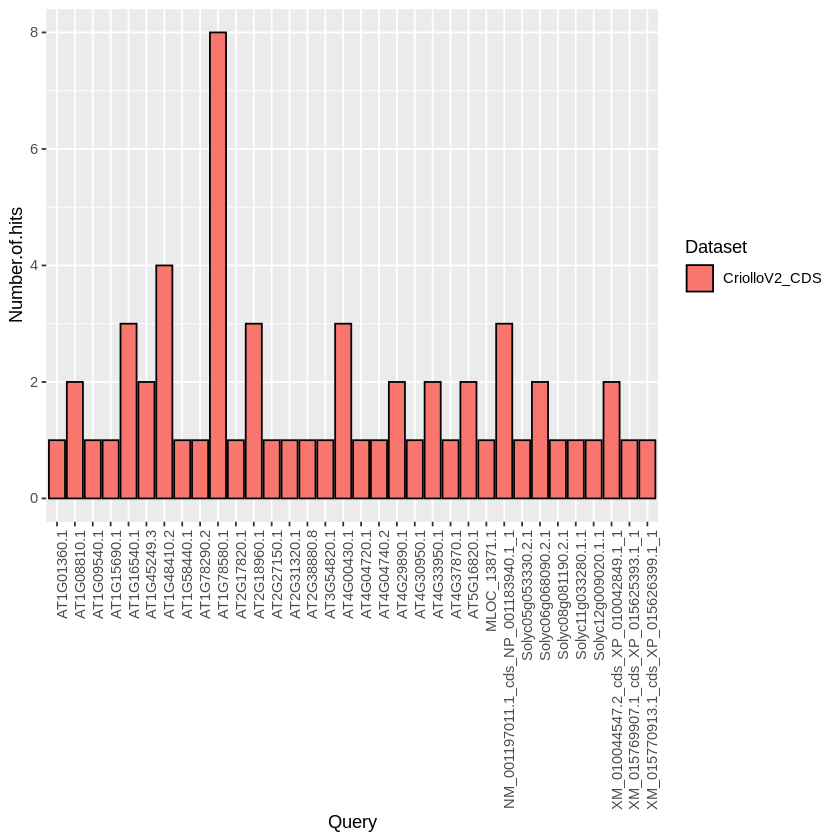

In [11]:
colorCount3= length(unique(results_blastEST_hits$Dataset)) #extend color palette
getPalette3= colorRampPalette(brewer.pal(12,"Paired"))

p7<-ggplot(results_blastEST_hits, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p7 + scale_fill_manual(values = getPalette3(colorCount3)) + theme(axis.text.x = element_text(angle = 90, hjust = 1) ) #rotate and adjust x axis text
p10<-ggplot(results_blastCriolloV2_hits, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p10 + theme(axis.text.x = element_text(angle = 90, hjust = 1) )

### Results: General annotations

- Query AY857933.1_cds_AAW47577.1_1
    - has more hits aprox 120 hits in total: Sequence from Gossypium, metallothionein, ROS scavenger; expression in tobacco: increased tolerance to abiotic stress
    - This query got more hits (78/2766) from the library EST_KZ0ACAF (leaves submited to drought stresses)

- 14/194 sequences in 17 EST
- 33/194 sequences in CDS Genome Criollo V2
- total 35/194 sequences have hits in both Genome and 17 EST

 
## B. Complete EST dataset 
<br> Datasets (from test 1.1 of Blast T. cacao):"results_ESTall" and "results_ESTall_hits"
- Theobroma cacao EST 163,304 sequences: Database 
- DroughtDB 194 sequences: Query

- __results__
        - 25/194 sequences had hits in the complete EST dataset

In [8]:
library("ggplot2")
library("repr")

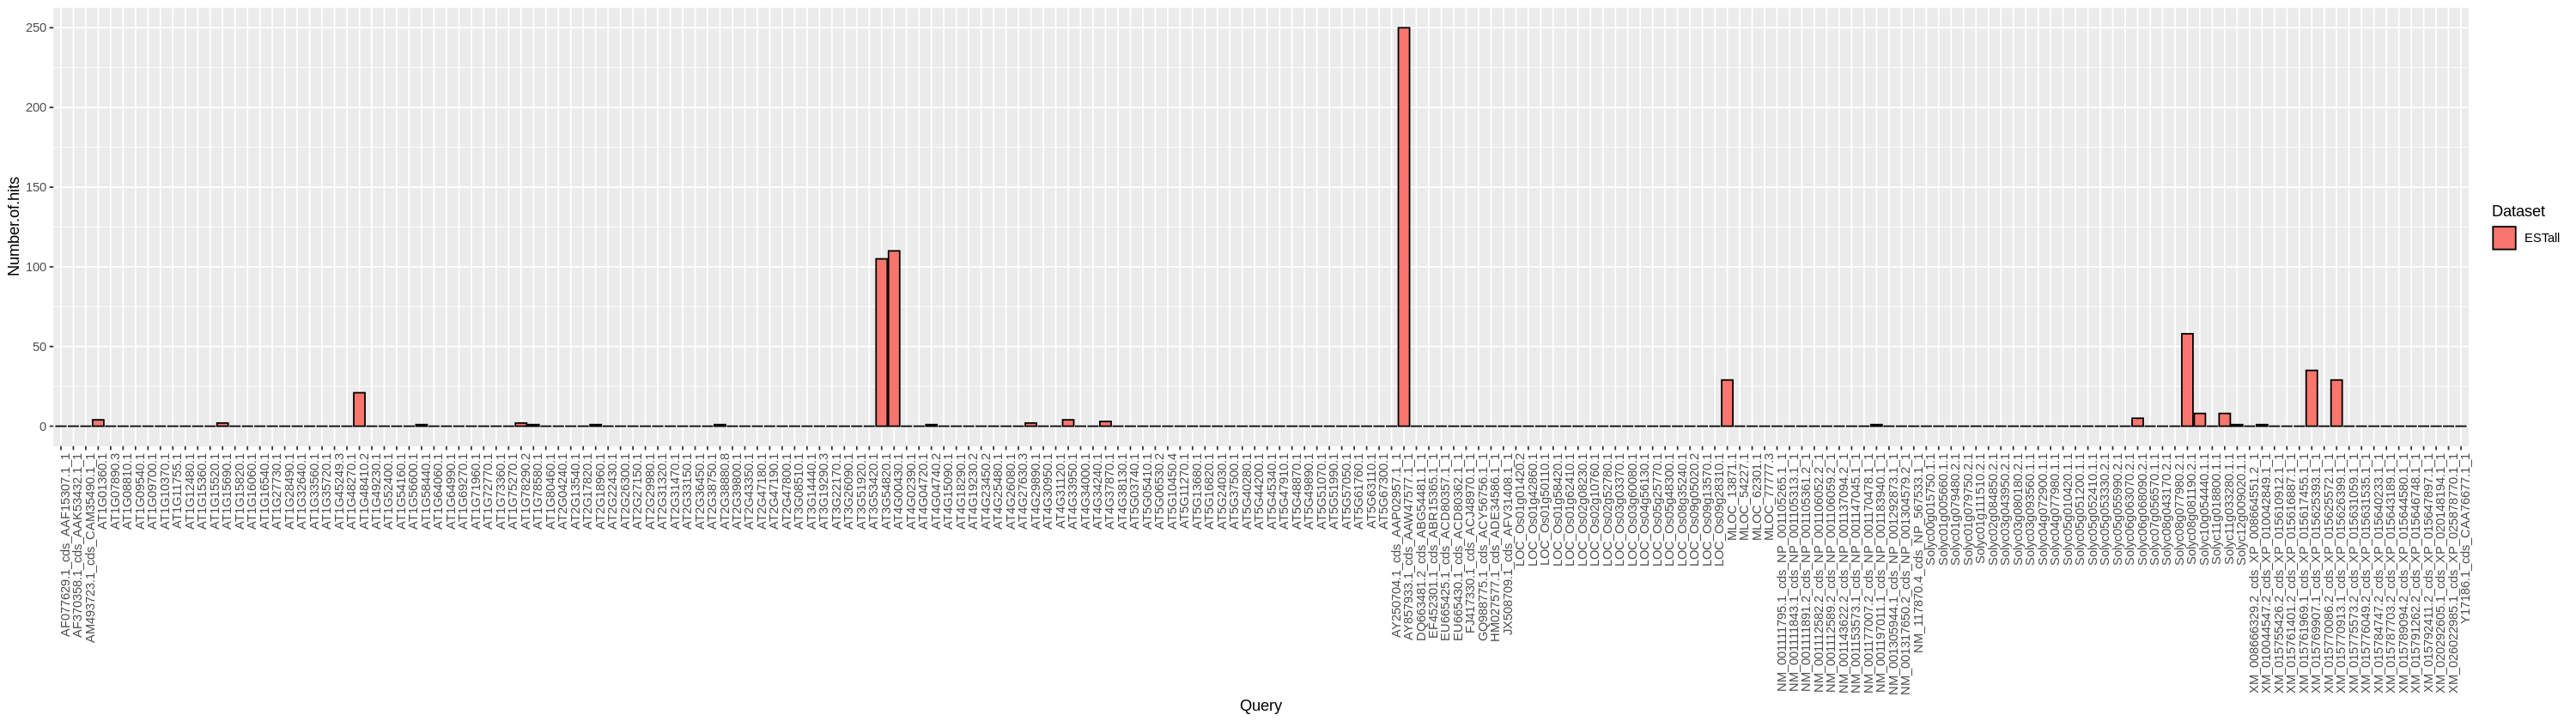

In [20]:
options(repr.plot.width=25, repr.plot.height=7)
p11<-ggplot(results_ESTall, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p11 + theme(axis.text.x = element_text(angle = 90, hjust = 1) )

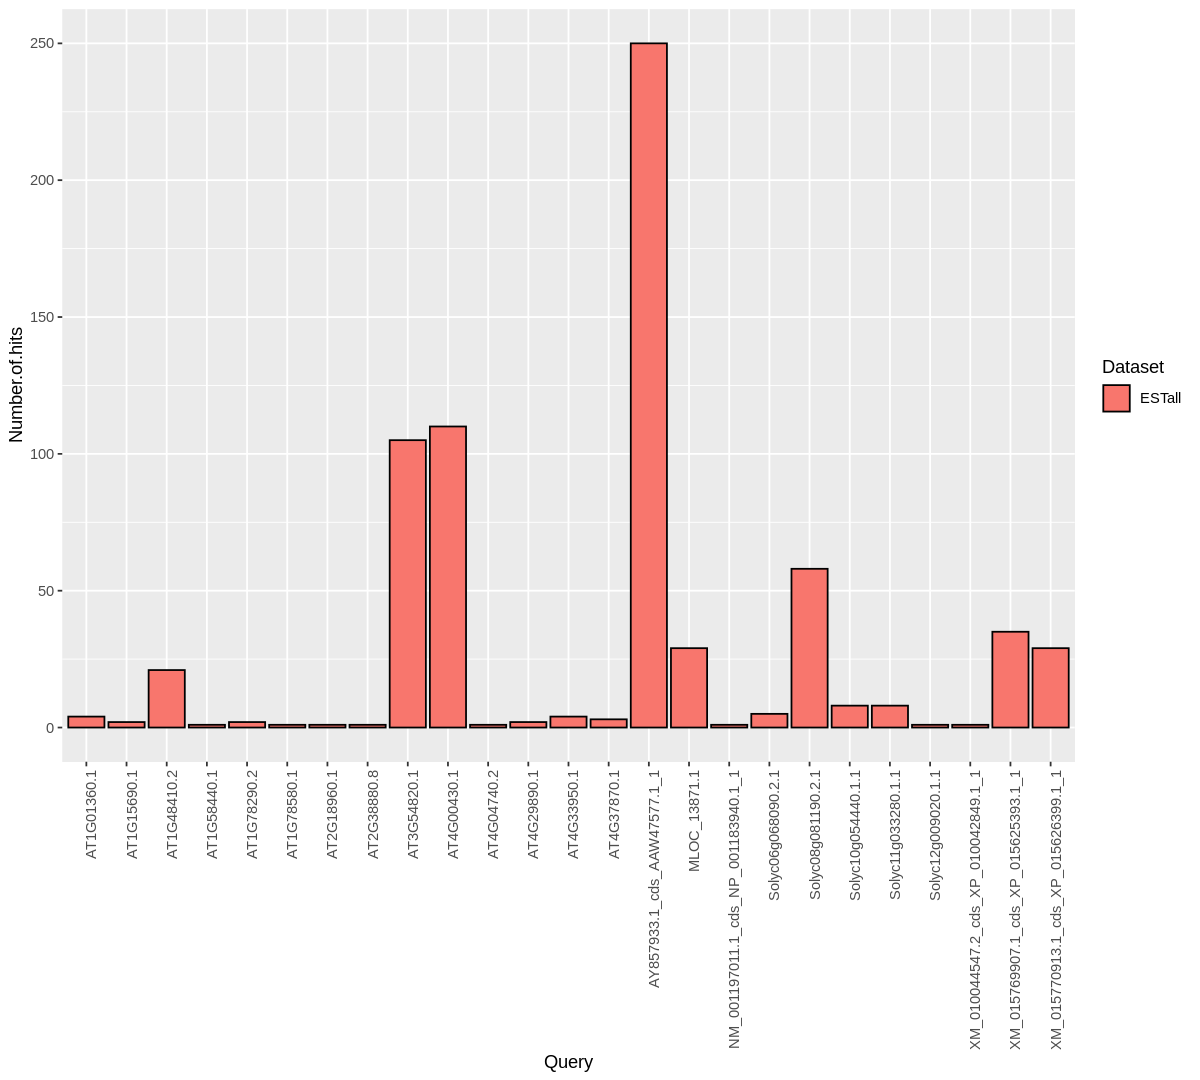

In [26]:
options(repr.plot.width=10, repr.plot.height=9)
p12<-ggplot(results_ESTall_hits, aes(fill=Dataset, y=Number.of.hits, x=Query)) + 
  geom_bar(position = "stack", stat = "identity", color="black") #stack: bars arrange one on top of the other
p12 + theme(axis.text.x = element_text(angle = 90, hjust = 1) )